## EmployeeSQL Bonus

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import host
from config import port
from config import user
from config import password
from config import db

engine = create_engine(f'postgresql://{user}:{password}@{host}/{db}')
connection = engine.connect()

In [2]:
salaries = pd.read_sql("SELECT * FROM salaries", connection)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0EBC2C1C8>]],
      dtype=object)

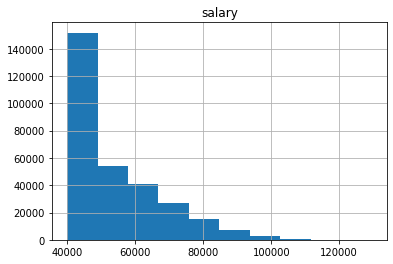

In [3]:
salaries.hist(column='salary')

In [4]:
titles = pd.read_sql("SELECT t.title, s.salary FROM employees AS e\
                     INNER JOIN salaries AS s ON e.emp_no=s.emp_no\
                     INNER JOIN titles AS t ON e.emp_title=t.title_id;", connection)
                     
titles.head()                     

,title,salary
0,Engineer,48973
1,Senior Engineer,40000
2,Technique Leader,43548
3,Staff,63377
4,Senior Engineer,40000


In [5]:
average_salary = titles.groupby('title').mean()['salary']
df = pd.DataFrame(average_salary)
df

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


([<matplotlib.axis.XTick at 0x1a0edbff788>,
 [Text(0, 0, 'Assistant Engineer'),
  Text(0, 0, 'Engineer'),
  Text(0, 0, 'Manager'),
  Text(0, 0, 'Senior Engineer'),
  Text(0, 0, 'Senior Staff'),
  Text(0, 0, 'Staff'),
  Text(0, 0, 'Technique Leader')])

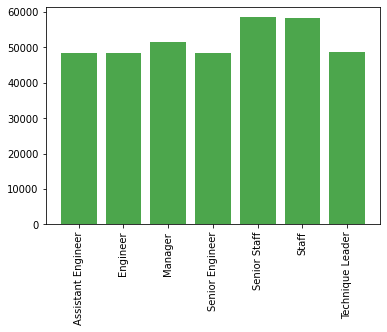

In [6]:
x_axis = np.arange(len(df.index.unique()))
y_axis = df['salary']

tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis, color='g', alpha=0.7, align="center")
plt.xticks(tick_locations, df.index.unique(), rotation="vertical")